In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

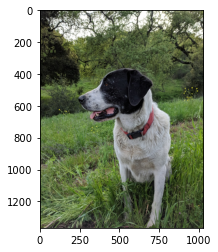

In [34]:
plt.imshow(full)

In [35]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

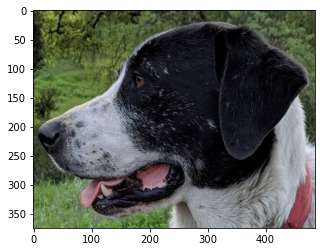

In [36]:
plt.imshow(face)

In [51]:
# face.shape

In [38]:
# full.shape

In [39]:
# sum([1,2,3])

In [40]:
# mystring = 'sum'

In [41]:
# eval(mystring)

In [42]:
# myFunc = eval(mystring)

In [43]:
# myFunc([1,2,3])

In [53]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

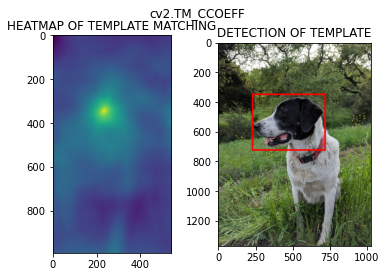

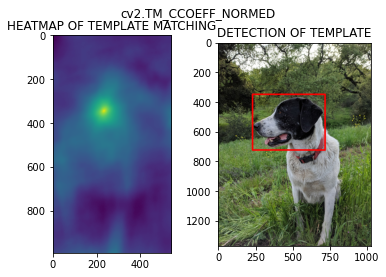

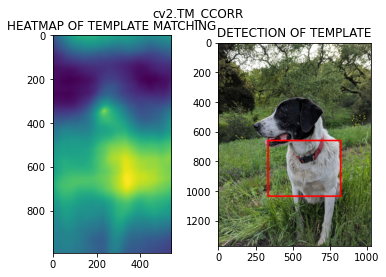

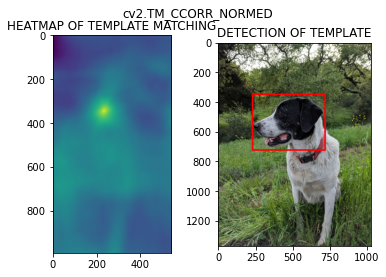

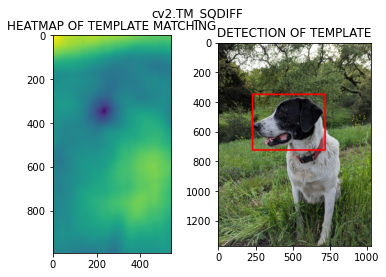

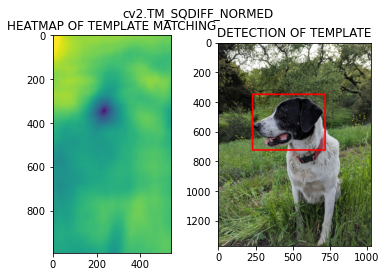

In [65]:
for m in methods:
    #create a copy
    full_copy = full.copy()
    
    method = eval(m)
    
    #template matching
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc #(x,y)
    else:
        top_left = max_loc
        
    heigh, width, channels = face.shape
    
    bottom_right = (top_left[0]+width, top_left[1]+heigh)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #PLOT AND SHOW THE IMAGES
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    #TITLE WITH THE METHOD USED
    plt.suptitle(m)
    
    plt.show()
    print('\n')
    print('\n')

In [58]:
my_method = eval('cv2.TM_CCOEFF') 
res = cv2.matchTemplate(full, face, my_method)

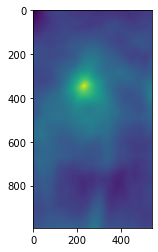

In [59]:
plt.imshow(res)

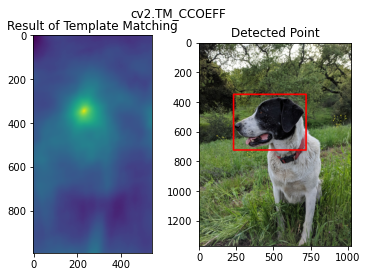

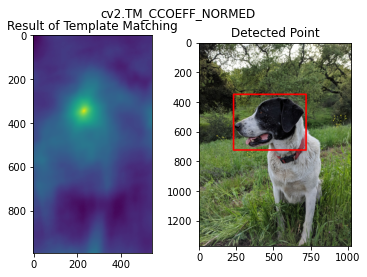

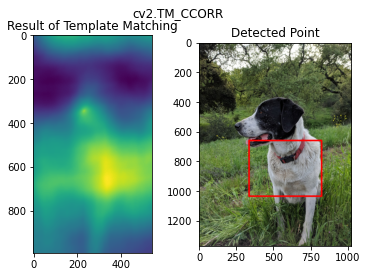

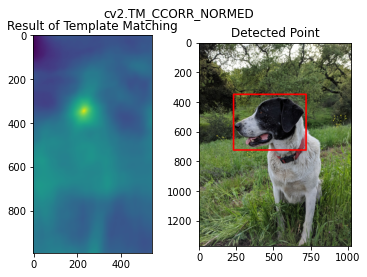

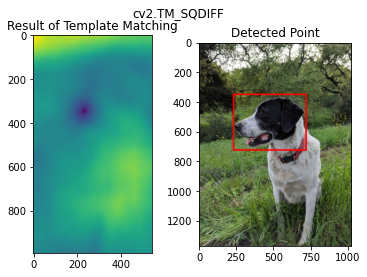

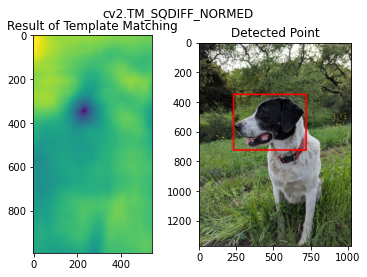

In [60]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    height, width, channels = face.shape
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    